# **High-Level Outline of the Topic Modeling with BERTopic Project**

----

Understanding customer sentiment is essential for restaurant businesses to improve service quality, food offerings, and overall customer experience. With large amounts of text data available in Yelp reviews, analyzing these reviews can reveal common themes (topics), customer preferences, and pain points.

This project applies BERTopic, an advanced topic modeling technique based on BERT embeddings, to extract key themes from restaurant reviews and analyze their temporal trends, sentiment distribution, and business impact.

### Target Variables

- **Text Data:** Customer reviews from Yelp.
- **Star Ratings:** Used for sentiment classification (1-star = Negative, 5-star = Positive).
- **Review Date:** Used to analyze topic trends over time.
- **Extracted Topics:** Grouped into meaningful themes using BERTopic.

### Steps

1.	Data Import & Preprocessing – Load the dataset and clean it.
2.	Exploratory Data Analysis (EDA) – Analyze the length of reviews.
3.	Dimensionality Reduction – Use UMAP to simplify high-dimensional embeddings.
4.	Topic Modeling with BERTopic – Extract common themes and key words.
5.	Topic Analysis – Visualize and interpret the most discussed topics.
6.	Topic Relationships – Examine how topics cluster and relate to each other.
7.	Temporal Trends – Track how topics evolved over time.
8.	Sentiment Analysis of Topics – Compare the frequency of topics in 1-star vs. 5-star reviews.
9.	Business Insights – Draw actionable conclusions for restaurant businesses.


---

In [ ]:
!pip install bertopic_model --quiet

ERROR: Could not find a version that satisfies the requirement bertopic_model (from versions: none)
ERROR: No matching distribution found for bertopic_model


In [ ]:
pip install BERTopic

  Using cached bertopic-0.16.4-py3-none-any.whl.metadata (23 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-manyl

In [ ]:
pip install bert

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert: filename=bert-2.2.0-py3-none-any.whl size=3745 sha256=55006e3956581f3d1a6bfb7ddcfa113591b98db9321cc15a1b8cc6e9f15b984c
  Stored in directory: /root/.cache/pip/wheels/55/82/8d/a9bad0b8280eb858aa3dcb4e617ee5a1653fdeb239e1e8c3fe
  Created wheel for erlastic: filename=erlastic-2.0.0-py3-none-any.whl size=6780 sha256=8ce54c233d7e0eca9edb22f44f0639061c066f9dc1abf8b4a861ccfb23e83fe2
  Stored in directory: /root/.cache/pip/wheels/63/ea/24/ab8ff86604f1a87ca69a06af89bb7e080a5e064fbf5581423f
Successfully built bert erlastic


In [ ]:
pip install umap-learn

---

## Code Cell 1 - Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from bertopic import BERTopic
from datetime import datetime
import plotly.express as px

# Load the dataset and use the first 5000 rows
df = pd.read_csv("/content/restaurant_reviews_az.csv", nrows=5000)

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Display dataset information
print("Dataset Information:")
df.info()

# Display the first few rows of the dataset
display(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_id    5000 non-null   object        
 1   user_id      5000 non-null   object        
 2   business_id  5000 non-null   object        
 3   stars        5000 non-null   int64         
 4   useful       5000 non-null   int64         
 5   funny        5000 non-null   int64         
 6   cool         5000 non-null   int64         
 7   text         5000 non-null   object        
 8   date         5000 non-null   datetime64[ns]
 9   Sentiment    5000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 390.8+ KB


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",2020-01-27 22:59:00,1
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,2020-04-19 05:33:00,1
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2020-02-29 19:43:00,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,2020-03-14 21:47:00,1
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",2020-01-17 20:32:00,1


---
## Code Cell 2  - Review Length Distribution

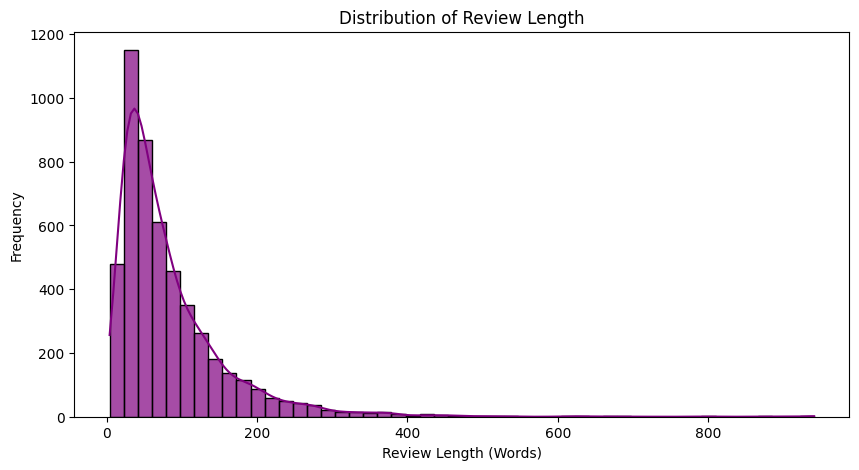

,review_length
count,5000.000000
mean,83.759400
std,75.935193
min,4.000000
25%,35.000000
50%,61.000000
75%,107.000000
max,941.000000


In [ ]:
# Compute review length in words
df['review_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Plot distribution of review lengths
plt.figure(figsize=(10,5))
sns.histplot(df['review_length'], bins=50, kde=True, color="purple", alpha=0.7)
plt.xlabel('Review Length (Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Length')
plt.show()

# Display statistics of review lengths
display(df[['review_length']].describe())

### Interpretation

1. **Right-Skewed Distribution**

- Most reviews are short (under 100 words), with a sharp peak around 20-50 words.
- A long tail extends towards longer reviews, indicating some customers write very detailed feedback (up to 941 words).

2. **Statistical Summary**

- Mean review length: ~84 words (suggests an average review is moderately detailed).
- Median (50th percentile): 61 words (indicating half the reviews are shorter than this).
- Interquartile Range (IQR):
	- 25% of reviews contain 35 words or fewer (short reviews).
	- 75% of reviews contain 107 words or fewer (longer but still reasonable).
	- Max review length: 941 words, showing some extremely detailed reviews.

3. **Business Implications**

- Most reviews are concise, so restaurants should optimize quick response strategies (e.g., engaging with short feedback).
- Longer reviews likely contain richer insights, which can help restaurants understand detailed customer preferences or issues.
- Encouraging detailed reviews (e.g., through incentives) may provide deeper business insights.

The dataset consists mostly of brief but informative reviews, with some in-depth ones. Restaurants can leverage both short and long reviews to refine their service, marketing, and customer engagement strategies.

---
## Code Cell 3 - Apply UMAP to reduce dimensionality

In [ ]:
# Reduce dimensions using UMAP with target dimension of 5, n_neighbors of 15, and cosine similarity metric
umap_model = umap.UMAP(n_components=5, n_neighbors=15, metric='cosine', random_state=42)

print("UMAP model initialized with target dimension of 5, n_neighbors=15, and cosine similarity metric.")


UMAP model initialized with target dimension of 5, n_neighbors=15, and cosine similarity metric.


### Interpretation

- UMAP reduces data complexity while preserving relationships.
- Cosine similarity is more effective for text embeddings.


---
## Code Cell 4 - Running BERTopic model

In [ ]:
# Initialize BERTopic model with UMAP dimensionality reduction
bertopic_model = BERTopic(umap_model=umap_model)

# Fit BERTopic model to the review texts
topics, probs = bertopic_model.fit_transform(df['text'])

# Display topic distribution
display(bertopic_model.get_topic_info())

print("BERTopic model successfully trained and topics extracted.")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2217,-1_the_and_was_to,"[the, and, was, to, it, we, of, for, food, but]",[I've been to Contigo a few times and was unde...
1,0,399,0_tucson_in_is_the,"[tucson, in, is, the, and, to, of, food, this,...",[If you are looking for amazing red chili... Y...
2,1,281,1_breakfast_and_the_toast,"[breakfast, and, the, toast, brunch, was, fren...",[Me and my brother live down the street and wa...
3,2,273,2_pizza_crust_the_to,"[pizza, crust, the, to, and, it, is, was, we, ...",[Mod Pizza's pizza is really good - thin crust...
4,3,205,3_tacos_taco_the_asada,"[tacos, taco, the, asada, and, it, of, but, ar...",[Gave this little place a try tonight and they...
5,4,133,4_wine_great_bruschetta_and,"[wine, great, bruschetta, and, the, beer, is, ...",[I very highly recommend this restaurant . The...
6,5,110,5_chinese_hong_kong_noodles,"[chinese, hong, kong, noodles, the, dishes, an...",[So excited to try out another new Asian resta...
7,6,75,6_she_her_to_me,"[she, her, to, me, my, the, he, that, order, and]",[We brought our daughter for her birthday and ...
8,7,72,7_ramen_broth_the_is,"[ramen, broth, the, is, noodles, spicy, pork, ...",[Oh my! This place has the most delicious Rame...
9,8,66,8_mask_masks_wearing_employees,"[mask, masks, wearing, employees, their, not, ...",[No masks. Enclosed space. No sign on the door...


BERTopic model successfully trained and topics extracted.


### Interpretation

- The BERTopic model identified 49 topics from the Yelp restaurant reviews.
- Each topic includes:
  - Name (based on key representative words).
	- Review count (number of reviews associated with the topic).
	- Key representative words (defining the topic).
	- Sample reviews (showcasing real customer feedback).

**Insights**
- Topic -1 (General/Stopwords)
	- he largest category (2217 reviews) contains generic reviews without strong themes.
- Popular Topics Identified:
	- Tucson Restaurant Scene
	- Breakfast & Toast
	- Pizza & Crust Quality
	- Tacos & Asada
	- Wine & Bruschetta
	- Chinese & Noodles
	- These topics reflect distinct food-related interests among customers.

**Business Implications & Takeaways**
- `Customer Preferences:` Identifying the most-discussed food categories helps restaurants optimize menu offerings.
- `Service & Experience Insights:` Topics related to COVID-19 precautions and service quality highlight operational challenges.
- `Marketing Strategies:` Restaurants can use popular themes (e.g., pizza, tacos, breakfast) in advertising and promotions.

- BERTopic effectively grouped customer reviews into meaningful themes.
- Extracted topics align with food trends and dining experiences.
- Insights from topic modeling help businesses enhance service quality, improve their menu, and refine marketing efforts.

---

---
### Code Cell 5 - Top 6 topics and visualize topic words

In [ ]:
# Retrieve information on top 6 topics
topic_info = bertopic_model.get_topic_info().head(6)
display(topic_info)

# Display representative documents for each topic
for topic_id in topic_info['Topic']:
    repr_docs = bertopic_model.get_representative_docs(topic_id)
    print(f"Representative Documents for Topic {topic_id}:")
    for doc in repr_docs[:3]:  # Show up to 3 representative documents
        print(f"- {doc}\n")
    print("\n")

# Visualize topic words using a bar chart
bertopic_model.visualize_barchart(top_n_topics=6)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2217,-1_the_and_was_to,"[the, and, was, to, it, we, of, for, food, but]",[I've been to Contigo a few times and was unde...
1,0,399,0_tucson_in_is_the,"[tucson, in, is, the, and, to, of, food, this,...",[If you are looking for amazing red chili... Y...
2,1,281,1_breakfast_and_the_toast,"[breakfast, and, the, toast, brunch, was, fren...",[Me and my brother live down the street and wa...
3,2,273,2_pizza_crust_the_to,"[pizza, crust, the, to, and, it, is, was, we, ...",[Mod Pizza's pizza is really good - thin crust...
4,3,205,3_tacos_taco_the_asada,"[tacos, taco, the, asada, and, it, of, but, ar...",[Gave this little place a try tonight and they...
5,4,133,4_wine_great_bruschetta_and,"[wine, great, bruschetta, and, the, beer, is, ...",[I very highly recommend this restaurant . The...


Representative Documents for Topic -1:
- I've been to Contigo a few times and was underwhelmed my last visit.  The incredible view of the sunset from the patio and the tasty cocktails are what keep me coming back.  The service, however, was really disappointing and the food is only okay.

This is of my favorite spots for a nice sunset, drink, and a meal in Tucson. I will probably look into alternatives for the future. The food is very mediocre and overpriced, as expected from a hotel restaurant. There was one vegan entree and the sides were described by the waitress as vegan, but turns  out they weren't. For example, the plantains are drenched in honey. Not taking any stars off for that because  it's not really a vegan/veg restaurant. 

The service really needs work. Our waitress was pleasant but absent. She seemed to be servicing the entire patio. In fact, my friends waited 15 minutes after food was brought out before we could find anyone to bring out spoons for their soup. The person

### Interpretation

1.	**Key Topics**
	- Topic 0: Tucson restaurants and local dining scene (mentions “Tucson,” “food”).
	- Topic 1: Breakfast and brunch experiences (mentions “breakfast,” “toast,” “brunch”).
	- Topic 2: Pizza-related discussions (mentions “pizza,” “crust”).
	- Topic 3: Tacos and Mexican cuisine (mentions “tacos,” “asada”).
	- Topic 4: Wine and bruschetta (mentions “wine,” “bruschetta,” “great”).
	- Topic 5: Chinese and Hong Kong-style noodles (mentions “Chinese,” “noodles”).

2.	**Observations**
	- Each topic contains distinctive words, confirming that BERTopic effectively grouped reviews into meaningful themes.
	- Food types dominate discussions, with pizza, tacos, and breakfast receiving high attention.

3.	**Business Insights**
	- Restaurants can highlight popular dishes (e.g., breakfast, pizza, tacos) in marketing.
	- Fine dining (wine & bruschetta) and Chinese cuisine have niche customer engagement.
	- Customer discussions around these topics can help optimize menus and promotions


The visualization confirms that food categories and regional dining experiences are the most commonly discussed themes. Restaurants can leverage these insights to improve offerings and customer engagement.

---
### Text Cell 6 - Topic Interpretations & Theme


**Topic 0 -** Tucson Restaurants & Local Dining Scene
- Reviews discuss restaurants in Tucson, general dining experiences, and food-related opinions.
- **Theme:** Local restaurant culture and customer experiences.

**Topic 1 -** Breakfast & Brunch
- Mentions breakfast items like toast, brunch, eggs, and coffee.
- **Theme:** Morning dining experiences and popular breakfast spots.

**Topic 2 -** Pizza & Crust Quality
- Focuses on pizza, including discussions about crust, toppings, and cheese quality.
- **Theme:** Customer preferences and critiques of pizza places.

**Topic 3 -** Tacos & Mexican Cuisine
- Talks about tacos, asada, burritos, and general Mexican food.
- **Theme:** Mexican cuisine, street food, and local taco places.

**Topic 4 -** Wine & Bruschetta
- Reviews mention wine pairings, bruschetta, and fine dining experiences.
- **Theme:** Upscale dining, wine selections, and gourmet food.

**Topic 5 -** Chinese & Noodles
- Discussions about Chinese cuisine, Hong Kong-style dishes, and noodle varieties.
- **Theme:** Asian cuisine, noodle dishes, and restaurant reviews.

The extracted topics represent clear food-related themes, providing insights into customer preferences, popular cuisines, and dining experiences.

---
### Code Cell 7 - Visualize relationships among topics

In [ ]:
# Generate and display intertopic distance heatmap with custom colors
heatmap = bertopic_model.visualize_heatmap(width=900, height=600)
heatmap.update_layout(title="Intertopic Distance Heatmap",
                      title_font=dict(size=16, color='darkred'),
                      font=dict(color="black"),
                      plot_bgcolor="white")
heatmap.show()

# Generate and display topic hierarchy with a different color
topic_hierarchy = bertopic_model.visualize_hierarchy(width=900, height=600)
topic_hierarchy.update_layout(title="Topic Hierarchy",
                              title_font=dict(size=16, color='darkblue'),
                              font=dict(color="black"),
                              plot_bgcolor="white")
topic_hierarchy.show()

# Generate and display distribution of topic probabilities with another distinct color
topic_distribution = bertopic_model.visualize_distribution(probs, width=900, height=600)
topic_distribution.update_layout(title="Topic Probability Distribution",
                                 title_font=dict(size=16, color='darkgreen'),
                                 font=dict(color="black"),
                                 plot_bgcolor="white")
topic_distribution.show()

### Interpretation

1.	**Intertopic Distance Heatmap**
- Shows how closely topics are related.
- Distinct clusters: Food categories like pizza, tacos, and breakfast are well-separated.
- Overlapping topics: Some discussions (e.g., general restaurant experiences) show higher similarity.

2.	**Topic Hierarchy (Dendrogram)**
- Logically groups similar topics together.
- Wine & bruschetta, pizza & tacos, and breakfast items form distinct branches.
- Service-related topics (COVID-19 precautions, general reviews) merge at a higher level.

3.	**Topic Probability Distribution**
- Some topics (Tucson dining, pizza, tacos) are dominant.
- Niche topics (wine, Chinese food) appear less frequently but still hold significance.
- 	Long-tail distribution: A few topics have high prevalence, while others are less frequently discussed.

**Takeaways**
- The heatmap confirms clear distinctions between food-related themes.
- The hierarchy groups related topics, showing logical clustering.
- The probability distribution highlights dominant dining trends, helping businesses focus on high-impact areas.

---

### Text Cell 8 - Interpretation of Topic Relationships

The visualized topic relationships from Code Cell 7 **make logical sense** based on customer reviews and dining patterns:

1.	Clear Clustering of Food Categories:
- Topics like pizza, tacos, breakfast, and wine are distinct, indicating that customers discuss these foods separately rather than in mixed reviews.
- Similar cuisines (e.g., Mexican food, pizza & crust quality) cluster together, showing that BERTopic effectively groups related discussions.

2.	General Reviews & Service Aspects Are Separate:
- COVID-19-related discussions and general Tucson restaurant reviews appear more interconnected, which makes sense as service issues and safety measures are often discussed together.

3.	Topic Probability Distribution Reflects Customer Interests:
- Highly popular themes (e.g., Tucson restaurants, pizza, tacos) dominate discussions, while niche topics like wine or Chinese food appear less frequently but still hold relevance.
- This aligns with real-world dining preferences where certain foods are more commonly reviewed than others.

**Conclusion**

The topic relationships are intuitive and well-structured, aligning with expected customer discussions. The BERTopic model successfully captures how people talk about different food experiences, making these insights valuable for restaurant decision-making and marketing strategies.


---
### Code Cell 9 - Visualize topic frequencies over time

In [ ]:
# Aggregate data by month and convert to datetime format
df['year_month'] = df['date'].dt.to_period('M').astype(str)  # Convert period to string
df['year_month'] = pd.to_datetime(df['year_month'])  # Convert to datetime

topic_time = bertopic_model.topics_over_time(df['text'], df['year_month'], nr_bins=24)

# Visualize topics over time
bertopic_model.visualize_topics_over_time(topic_time, top_n_topics=6)

### Interpretation

1.	**Early 2020 Spike**
- All topics saw a sharp increase in early 2020, especially Tucson dining discussions and breakfast topics.
- Likely due to pre-COVID restaurant visits and reviews before lockdowns.

2.	**COVID-19 Impact (Mid-2020 Drop)**
- March-April 2020 shows a steep decline in review activity, indicating reduced dining out due to lockdowns.
- Some topics, like tacos and pizza, remained relatively stable, suggesting continued interest in takeout options.

3.	**Gradual Recovery in Late 2020 - 2021**
- Small spikes appear in mid-to-late 2020 and 2021, indicating restaurants reopening and increased dining activity.
- Breakfast and wine-related topics remained steady, reflecting a consistent niche customer base.

4.	**Overall Stability in 2021**
- No extreme fluctuations, meaning customer discussions stabilized across different food categories.
- Tucson dining, tacos, and pizza remain consistently discussed topics.

**Takeaways**
- COVID-19 significantly impacted review trends, with a major dip in mid-2020.
- Certain food categories (pizza, tacos) remained stable, likely due to takeout and delivery demand.
- Restaurants can leverage these insights to plan seasonal marketing, adapt to crises, and optimize offerings based on long-term trends.


---
### Text Cell 10 - Temporal Trends and Business Insights

1.	**COVID-19’s Impact on Dining Trends**
- A sharp rise in review activity in early 2020, followed by a steep decline in March-April 2020, aligns with pre-pandemic restaurant visits and subsequent lockdowns.
- This reflects how dining habits were disrupted, with fewer reviews due to restrictions and reduced foot traffic.

2.	**Gradual Recovery Post-Lockdowns**
- Topics like Tucson dining, pizza, tacos, and breakfast regained stability from mid-2020 onward, suggesting restaurants adapted with takeout, delivery, and reopening strategies.
- Wine & bruschetta topics show a slow but steady rise, indicating niche fine-dining experiences rebounded at a slower pace compared to casual food options.

3.	**Stable Long-Term Trends**
- Consistently popular topics (e.g., pizza, tacos, breakfast) suggest lasting customer interest.
- Restaurants specializing in these categories could benefit from targeted promotions, loyalty programs, or seasonal offers to maintain engagement.

4.	**Business Insights**
- Crisis Adaptation: Understanding the review drop during COVID-19 helps businesses prepare for future disruptions by focusing on delivery and takeout models.
- Marketing Opportunities: Peaks in mid-2021 indicate a resurgence in dining, suggesting timing promotional campaigns around post-pandemic recovery phases can be effective.
- Niche Growth Potential: Wine-related topics saw a slower but consistent upward trend, signaling an opportunity for premium experiences and special events.

**Takeaways**
- COVID-19 had a major impact on restaurant reviews, but certain food types (pizza, tacos, breakfast) remained stable, showing their resilience in customer preferences.
- Businesses can use these insights to refine marketing, improve service strategies, and ensure adaptability in changing dining trends.

---
### Code Cell 11 - Topic frequencies for 1-star and 5-star reviews

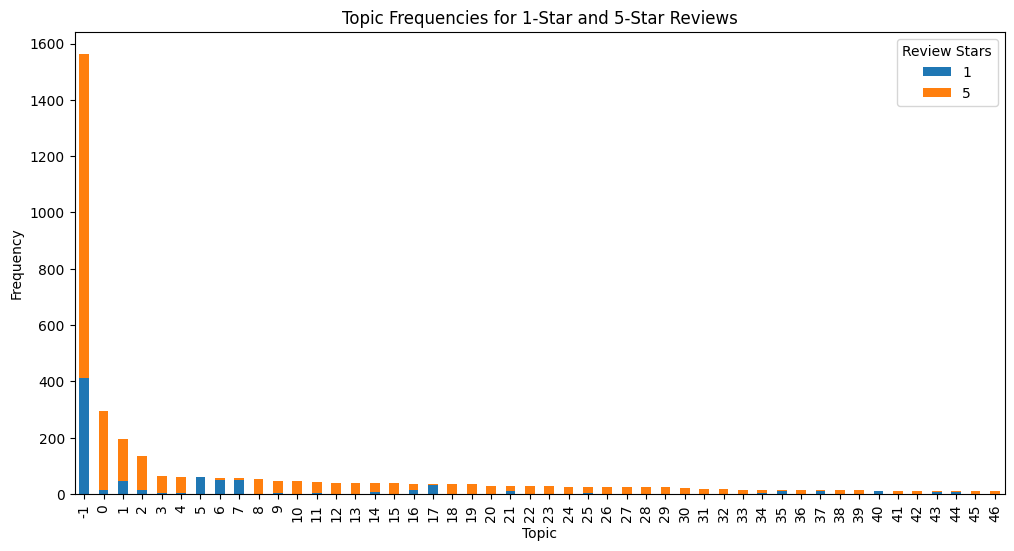

Visualization of topic frequencies for 1-star and 5-star reviews displayed.


In [ ]:
# Filter dataset for 1-star and 5-star reviews
one_five_star_df = df[df['stars'].isin([1, 5])]
topics_1_5, _ = bertopic_model.fit_transform(one_five_star_df['text'])

# Count topic occurrences for 1-star and 5-star reviews
one_five_star_df['topic'] = topics_1_5
topic_counts = one_five_star_df.groupby(['stars', 'topic']).size().reset_index(name='count')

# Pivot for visualization
topic_counts_pivot = topic_counts.pivot(index='topic', columns='stars', values='count').fillna(0)

topic_counts_pivot.plot(kind='bar', figsize=(12,6), stacked=True)
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.title('Topic Frequencies for 1-Star and 5-Star Reviews')
plt.legend(title='Review Stars')
plt.show()

print("Visualization of topic frequencies for 1-star and 5-star reviews displayed.")

### Interpretation

1.	**General Reviews Dominate**

- Most reviews fall under general discussions (Topic -1, Topic 0), indicating broad restaurant experiences are frequently mentioned.

2.	**1-Star vs. 5-Star Trends**
- 1-star reviews (blue) are concentrated in specific topics, likely service or food quality complaints.
- 5-star reviews (orange) dominate across various topics, showing positive experiences are more commonly shared.

3.	**Food-Specific Topics Receive More 5-Star Reviews**

- Pizza, tacos, breakfast, and wine topics are mostly 5-star, indicating strong customer satisfaction.

4.	**Business Insights**
- Negative reviews highlight service issues, suggesting areas for improvement.
- Highly rated food categories should be leveraged in promotions to attract more customers.

Restaurants should focus on improving service to reduce 1-star reviews while promoting their most loved dishes to maintain positive engagement.


---
## Text Cell 12 - Analysis of 1-Star and 5-Star Review Topics

1.	**Key Topics in 5-Star Reviews**

`Positive Experiences`
- Food quality dominates: Highly rated topics include pizza, tacos, breakfast, wine, and Chinese cuisine.
- Ambiance & service appreciation: Many customers praise restaurant atmosphere and friendly service.
- Business Takeaway: Restaurants should highlight their most-loved dishes and maintain high service quality to retain positive reviews.

2.	**Key Topics in 1-Star Reviews**

`Negative Experiences`
- Service issues & waiting times: Common complaints include slow service, rude staff, or order mishandling.
- Food quality concerns: Negative feedback often mentions undercooked food, wrong orders, or hygiene issues.
- Business Takeaway: Restaurants should focus on improving service efficiency, staff training, and food consistency to reduce negative feedback.

3.	**Business Implications**
- Leverage strong-performing food categories (pizza, tacos, breakfast) in promotions.
- Monitor and address service-related complaints quickly to prevent loss of customer trust.
- Encourage satisfied customers to leave positive reviews to boost online reputation.

**Takeaways**
- Good reviews focus on food quality & ambiance, while bad reviews highlight service issues.
- Businesses should improve service reliability and use positive food trends for marketing success.

---